In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [4]:
pip install sklearn_pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
    [([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
    input_df=True,
    df_out=True
)

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
    [(category_feature, SimpleImputer(strategy="most_frequent")) for category_feature in categorical_columns],
    input_df=True,
    df_out=True
)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve, auc, confusion_matrix
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin

# Set seed for reproducibility
np.random.seed(42)

# Generate a dummy dataset with approximately 100 rows
N = 100
kidney_data = pd.DataFrame({
    'age': np.random.randint(20, 80, size=N),              # Age between 20 and 80
    'blood_pressure': np.random.randint(100, 160, size=N),   # Blood pressure between 100 and 160
    'gender': np.random.choice(['M', 'F'], size=N)           # Random gender values
})
y = np.random.randint(0, 2, size=N)  # Binary target variable

# Define a simple transformer as a placeholder for combining numeric & categorical features
class IdentityTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X

numeric_categorical_union = IdentityTransformer()

# Define a Dictifier transformer that converts DataFrame rows to dictionaries
class Dictifier(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.to_dict(orient='records')

# Create the pipeline with all preprocessing and modeling steps
pipeline = Pipeline([
    ("featureunion", numeric_categorical_union),         # Dummy transformer for demo purposes
    ("dictifier", Dictifier()),                            # Convert DataFrame rows into dictionaries
    ("vectorizer", DictVectorizer(sort=False)),            # One-hot encodes categorical features
    # XGBoost classifier (disabling label encoder warning by setting use_label_encoder and eval_metric)
    ("clf", XGBClassifier(max_depth=3, use_label_encoder=False, eval_metric='logloss'))
])

# Evaluate the model with 3-fold cross-validation using ROC-AUC scoring
cv_scores = cross_val_score(pipeline, kidney_data, y, scoring="roc_auc", cv=3)
print("3-fold AUC:", np.mean(cv_scores))

# Obtain cross-validated predicted probabilities and classes for further evaluation and visualization
y_pred_proba = cross_val_predict(pipeline, kidney_data, y, cv=3, method="predict_proba")
y_pred = np.argmax(y_pred_proba, axis=1)

3-fold AUC: 0.530669265756985


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

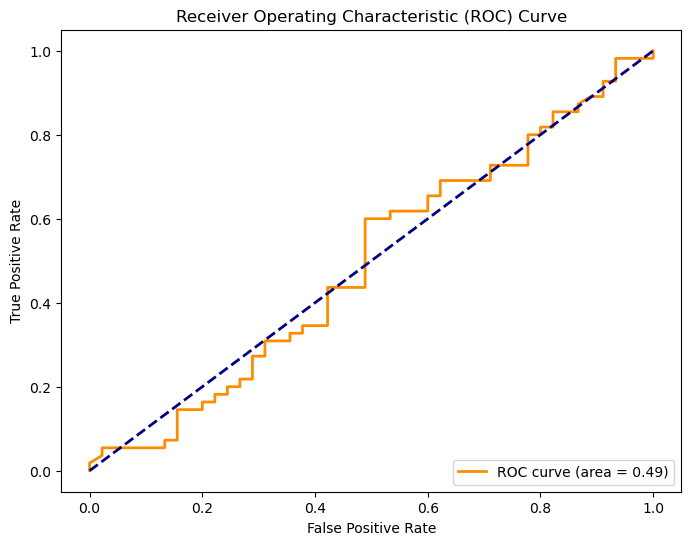

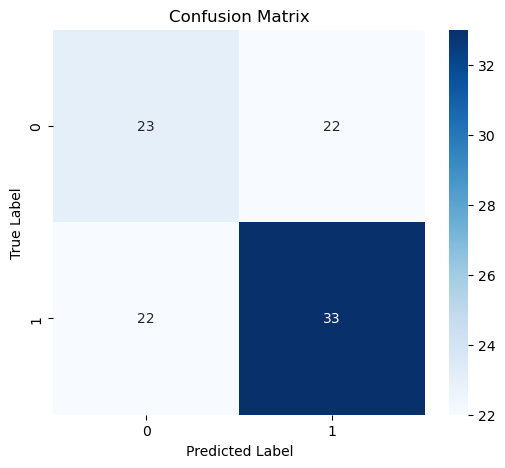

In [72]:
# -------------------
# Visualization 1: ROC Curve
# -------------------
fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# -------------------
# Visualization 2: Confusion Matrix
# -------------------
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:02:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


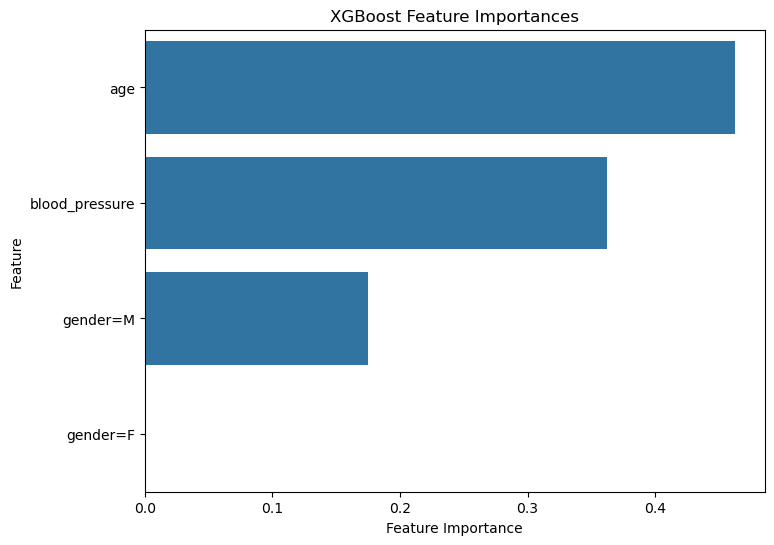

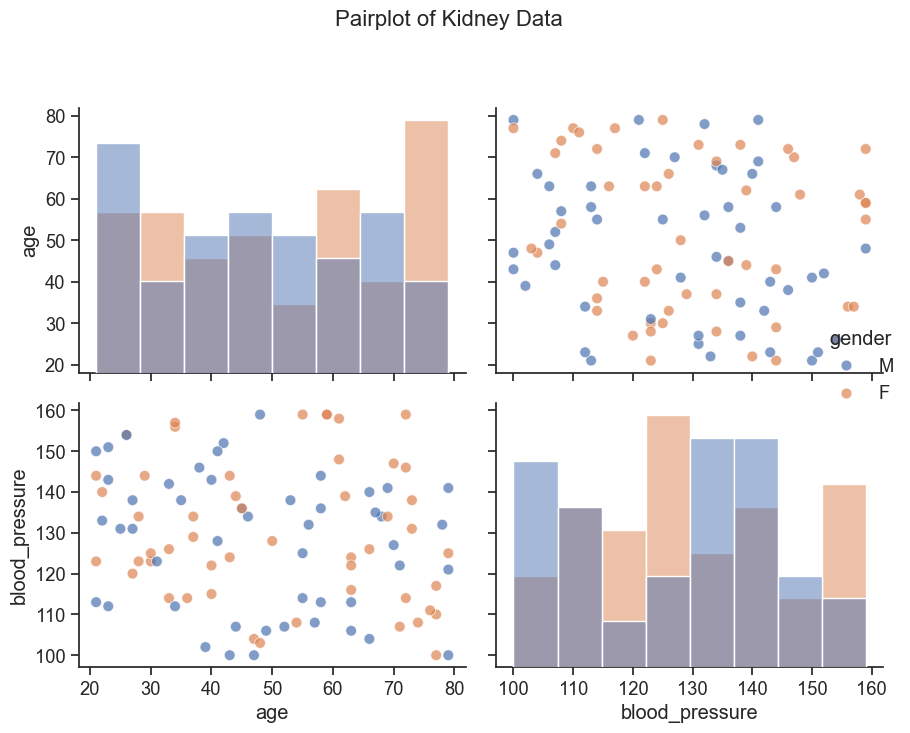

In [76]:
# -------------------
# Visualization 3: XGBoost Feature Importances
# -------------------
# Fit the pipeline on the entire dataset to extract the feature importances
pipeline.fit(kidney_data, y)

# Extract feature names from the DictVectorizer using get_feature_names_out() 
feature_names = pipeline.named_steps["vectorizer"].get_feature_names_out()
importances = pipeline.named_steps["clf"].feature_importances_

# Create a DataFrame for plotting feature importances
feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="importance", y="feature", data=feat_imp_df)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importances")
plt.show()

# -------------------
# Visualization 4: Pairplot of the Dummy Dataset
# -------------------
# Visualize pairwise relationships among features, with color based on 'gender'
# Set the overall figure size for more space
sns.set(style="ticks", font_scale=1.2)
pair_grid = sns.pairplot(
    kidney_data,
    hue="gender",
    diag_kind="hist",
    height=3.5,       # Height of each subplot
    aspect=1.2,       # Width = aspect * height
    plot_kws={'s': 60, 'alpha': 0.7}  # Larger and slightly transparent markers
)

# Improve layout and title spacing
pair_grid.fig.suptitle("Pairplot of Kidney Data", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()